In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from skmultilearn.adapt import MLkNN
from sklearn.metrics import hamming_loss, accuracy_score

In [65]:
df = pd.read_csv('../Dataset/songs_preprocessed_with_genre.csv')
df = df.drop(['Unnamed: 0', 'genre'], axis=1)
df

,loudness,year,energy,popularity,valence,explicit,mode,danceability,instrumentalness,speechiness,...,genre.World/Traditional,genre.blues,genre.classical,genre.country,genre.easy listening,genre.hip hop,genre.latin,genre.metal,genre.pop,genre.rock
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,...,0,0,0,0,0,0,0,0,1,0
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,...,0,0,0,0,0,0,0,0,1,1
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,...,0,0,0,1,0,0,0,0,1,0
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,...,0,0,0,0,0,0,0,1,0,1
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,...,0,0,0,0,0,0,0,0,1,0
1722,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,...,0,0,0,0,0,0,0,0,1,0
1723,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,...,0,0,0,1,0,1,0,0,0,0
1724,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,...,0,0,0,0,0,0,0,0,1,0


# Feature selection

In [67]:
to_remove_features = ['popularity', 'mode', 'instrumentalness', 'duration_ms', 'tempo']
df.drop(to_remove_features, axis=1, inplace=True)

In [68]:
df

,loudness,year,energy,valence,explicit,danceability,speechiness,acousticness,key,liveness,...,genre.World/Traditional,genre.blues,genre.classical,genre.country,genre.easy listening,genre.hip hop,genre.latin,genre.metal,genre.pop,genre.rock
0,0.264478,0.0,0.090909,0.735225,0.825230,0.744639,0.037084,0.307363,0.915499,0.232272,...,0,0,0,0,0,0,0,0,1,0
1,0.145673,0.0,0.045455,0.360520,0.891961,0.770630,0.046310,0.010534,0.690876,0.588118,...,0,0,0,0,0,0,0,0,1,1
2,0.370598,0.0,0.045455,0.472813,0.467217,0.568584,0.010492,0.177238,0.256605,0.509441,...,0,0,0,1,0,0,0,0,1,0
3,0.300402,0.0,0.090909,0.498818,0.908908,0.812877,0.042330,0.026928,0.541127,0.397615,...,0,0,0,0,0,0,0,1,0,1
4,0.235918,0.0,0.090909,0.573286,0.924796,0.776164,0.051375,0.041784,0.899454,0.746771,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,0.183286,0.0,0.954545,0.842790,0.719309,0.763366,0.064399,0.043731,0.977538,0.516727,...,0,0,0,0,0,0,0,0,1,0
1722,0.176281,0.0,0.954545,0.500000,0.685415,0.731643,0.242041,0.119860,0.562520,0.729122,...,0,0,0,0,0,0,0,0,1,0
1723,0.236007,0.0,0.954545,0.848700,0.659994,0.586965,0.155210,0.068527,0.826719,0.251704,...,0,0,0,1,0,1,0,0,0,0
1724,0.156351,0.0,0.954545,0.723404,0.492638,0.642405,0.076700,0.461055,0.330410,0.284946,...,0,0,0,0,0,0,0,0,1,0


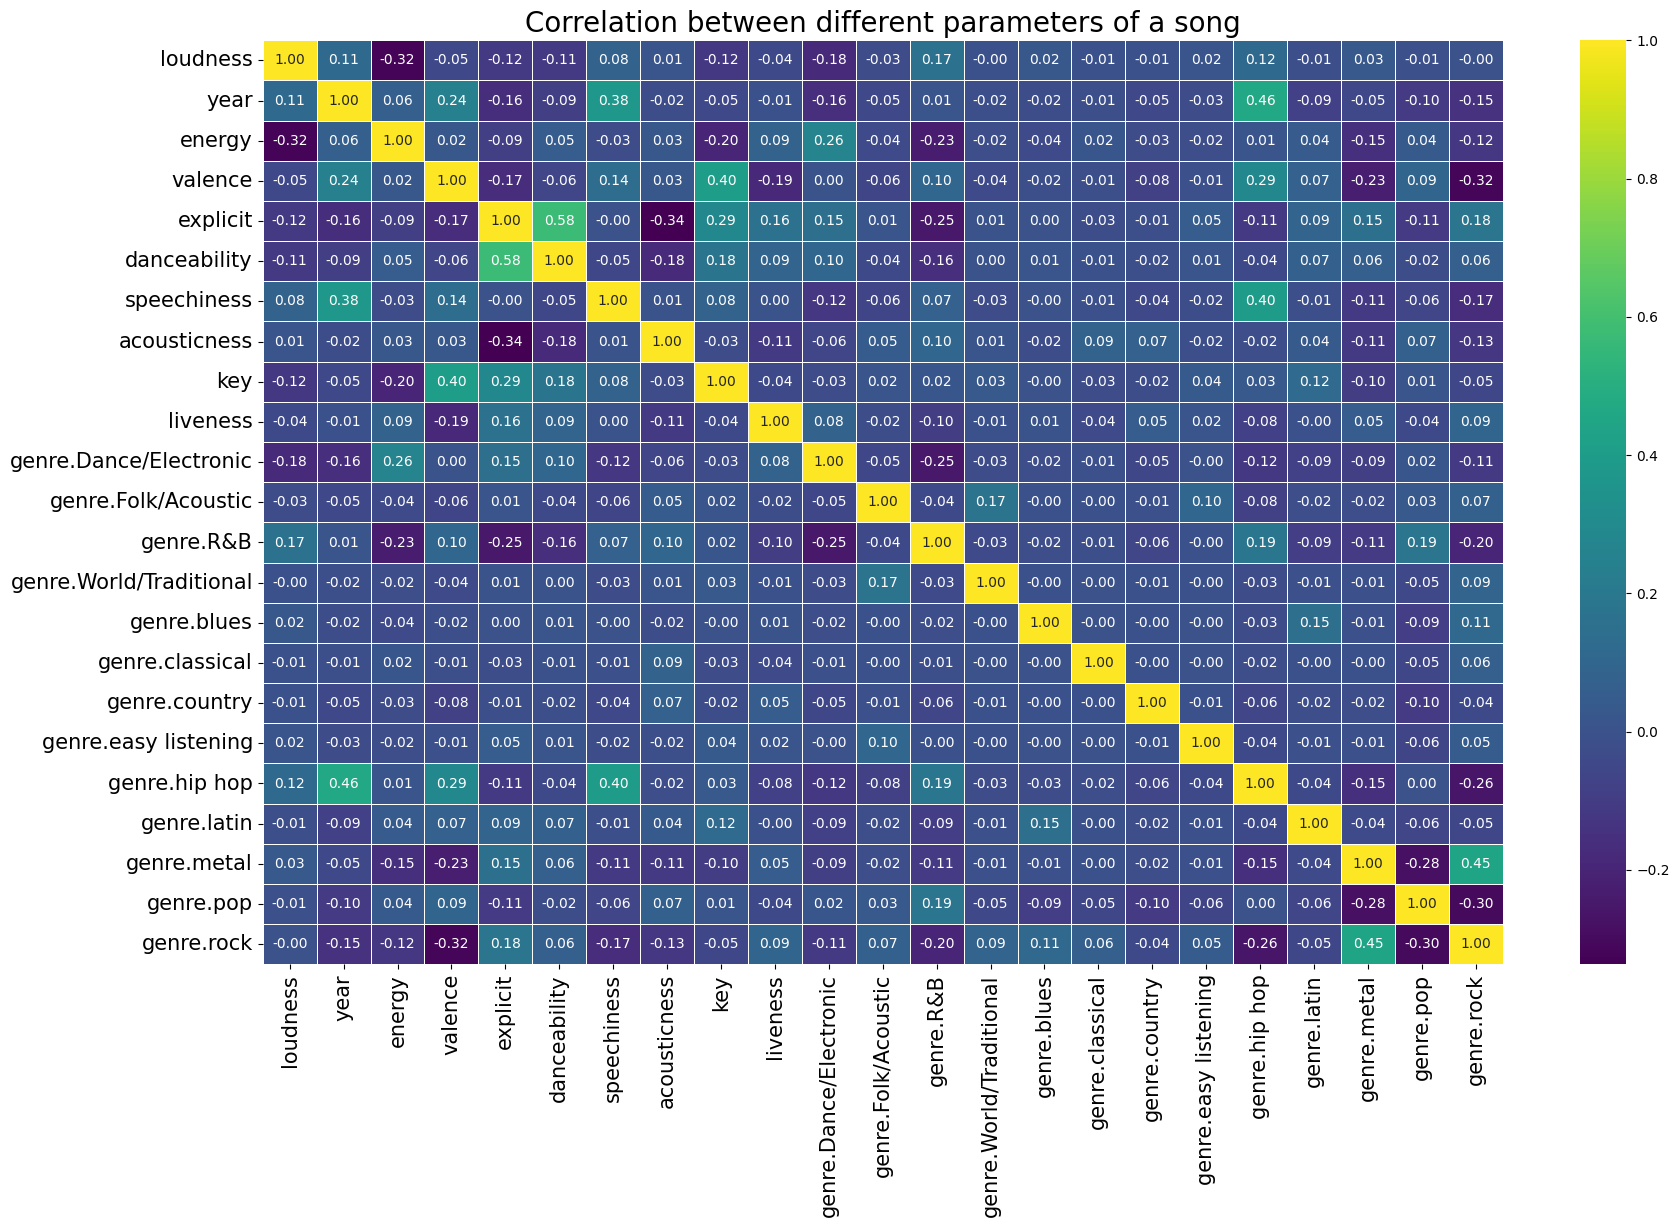

In [70]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")
plt.title('Correlation between different parameters of a song', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# Train/Test splititng

In [71]:
X = df[df.columns[:10]]
y = np.asarray(df[df.columns[10:]])

# splitting the data to training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MultiLable classification (KNN)

In [84]:
mlknn_classifier = MLkNN(k=5)
mlknn_classifier.fit(X_train, y_train)

/home/mohammad/.virtualenvs/spotify/lib/python3.10/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


MLkNN(k=5)

## Accuracy

In [75]:
predicted = mlknn_classifier.predict(X_test)

# Total number of predictions / Total number of correct predictions
# Number of predictions is number of each row
# Higher value is better
print(accuracy_score(y_test, predicted))

# Total number of predictions / Total number of incorrect predictions
# Number of predictions is number of each cell
# Lower is better
print(hamming_loss(y_test, predicted))

0.3439306358381503
0.07603379279679857
